<a href="https://colab.research.google.com/github/Tauqeer26/Deep-Projects/blob/master/Flowers_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

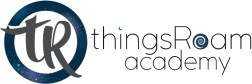

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/archive/flowers"))



In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
#preprocess.
from keras.preprocessing.image import ImageDataGenerator
#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

# Machine Learning Way of splitting data and labels

In [ ]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/content/drive/MyDrive/archive/flowers/daisy'
FLOWER_SUNFLOWER_DIR='../input/flowers/flowers/sunflower'
FLOWER_TULIP_DIR='../input/flowers/flowers/tulip'
FLOWER_DANDI_DIR='../input/flowers/flowers/dandelion'
FLOWER_ROSE_DIR='../input/flowers/flowers/rose'

In [ ]:
def assign_label(img,flower_type):
    return flower_type

In [ ]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

# Deep learning Way of label and splitting data

In [ ]:
datagen="/content/drive/MyDrive/archive/flowers"
data = ImageDataGenerator(validation_split=0.3, rescale=1./255)


In [ ]:
train_generator = data.flow_from_directory(
    datagen, 
    subset='training'
)

val_generator = data.flow_from_directory(
    datagen,
    subset='validation'
)

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(6, activation = "softmax"))



#https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D?version=nightly

# IMAGE AUGMENTATION

In [ ]:
'''
data = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) 
'''


In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
datagen="/content/drive/MyDrive/archive/flowers"
data = ImageDataGenerator(validation_split=0.2, rescale=1./255)

In [ ]:
train_generator = data.flow_from_directory(
    datagen, 
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    subset='training'
)

val_generator = data.flow_from_directory(
    datagen,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=2,
      verbose=1,
      validation_data = val_generator,
      validation_steps=8)
model.save("flowers.h5")

# **Fetching Kaggle dataset directly into Google Colab**


https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a